# Decision Trees and Random Forests

QUESTION: The Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations.


As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.

In [52]:
import pandas as pd

In [53]:
raw_df = pd.read_csv('../Datasets/weatherAUS.csv')
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [54]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [55]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

### Training, Validation and Test Sets

In [56]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [57]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [58]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [59]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [60]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [61]:
import numpy as np

In [62]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

### Handle missing data

In [63]:
from sklearn.impute import SimpleImputer

In [64]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [65]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

### Scaling Numeric Features

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [68]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [69]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


### Encoding Categorical Data

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [72]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [73]:
# Transform categorical columns for each dataset
train_encoded = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
val_encoded = encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_encoded = encoder.transform(test_inputs[categorical_cols].fillna('Unknown'))

In [74]:
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_cols, index=train_inputs.index)
val_encoded_df = pd.DataFrame(val_encoded, columns=encoded_cols, index=val_inputs.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_cols, index=test_inputs.index)

In [75]:
# Drop original categorical columns from the datasets
train_inputs = train_inputs.drop(columns=categorical_cols)
val_inputs = val_inputs.drop(columns=categorical_cols)
test_inputs = test_inputs.drop(columns=categorical_cols)

# Concatenate encoded columns back to the original data
train_inputs = pd.concat([train_inputs, train_encoded_df], axis=1)
val_inputs = pd.concat([val_inputs, val_encoded_df], axis=1)
test_inputs = pd.concat([test_inputs, test_encoded_df], axis=1)

In [76]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## Training and Visualizing Decision Trees
A decision tree in general parlance represents a hierarchical series of binary decisions

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
model = DecisionTreeClassifier(random_state=12)

In [79]:
model.fit(X_train, train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,12
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [81]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [82]:
train_probs = model.predict_proba(X_train)

In [83]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [84]:
accuracy_score(train_targets, train_preds)

0.9999797955307714

In [85]:
model.score(X_val, val_targets)

0.7913063664325924

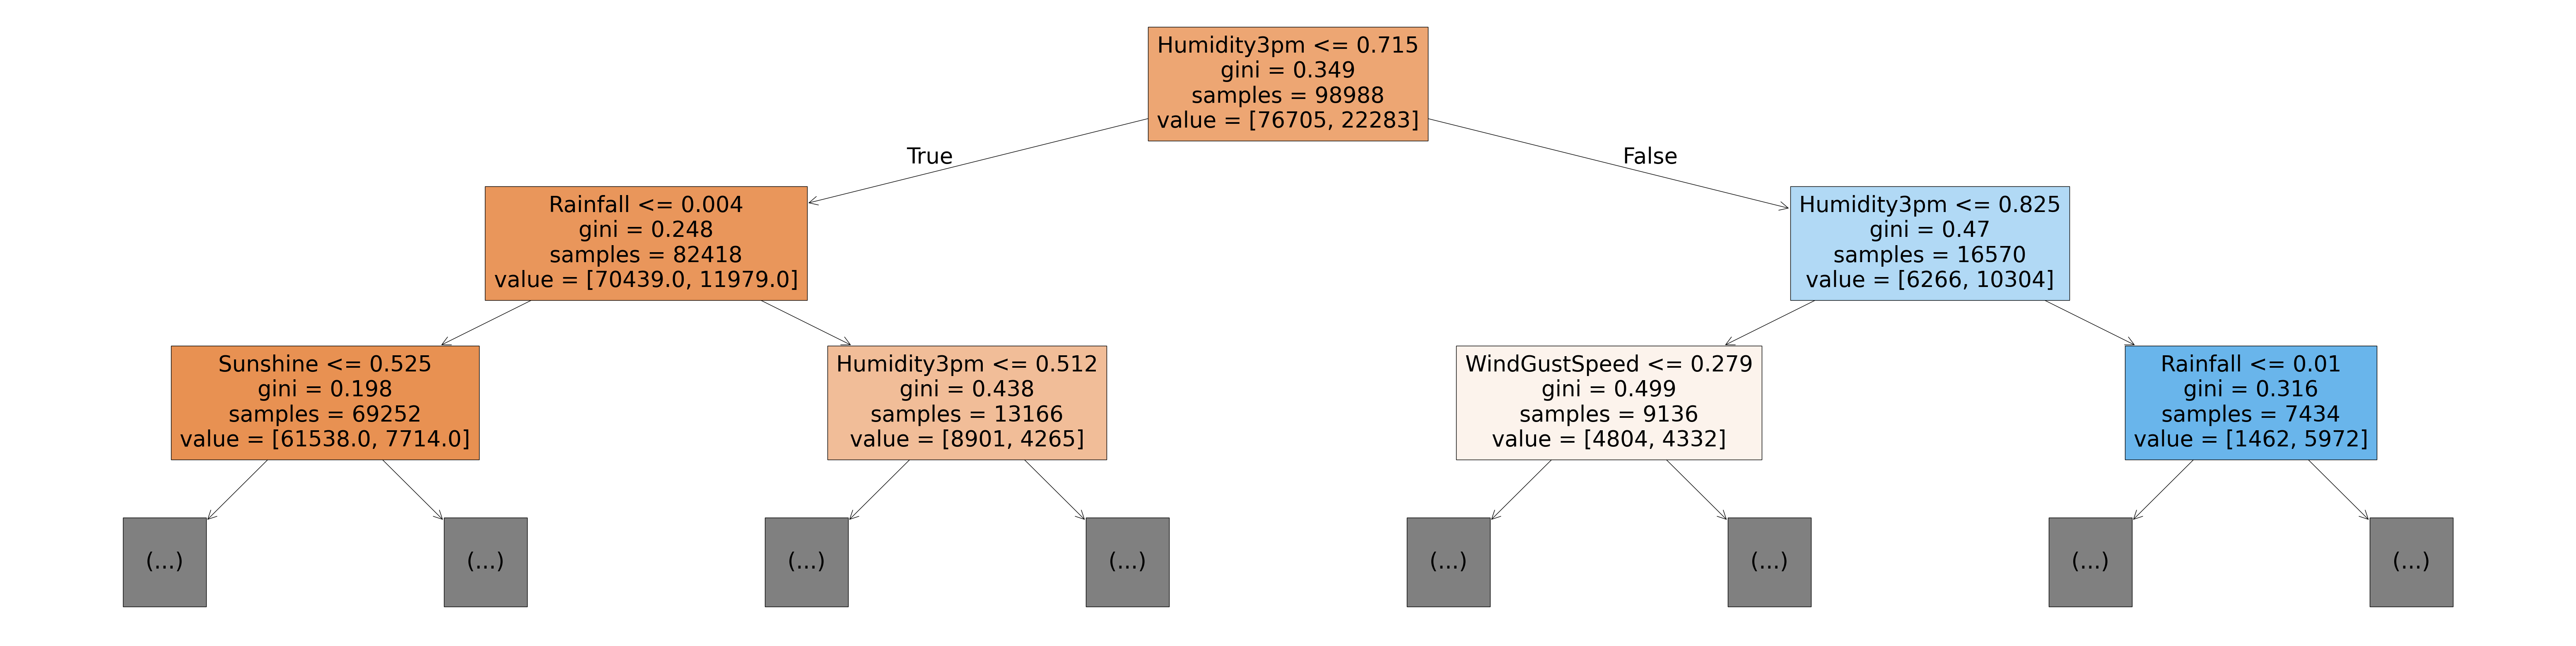

In [86]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [87]:
model.tree_.max_depth

48

In [88]:
# Since training accuracy is 99.99 while validation accuracy is 79. It seems model is overfit. To reduce overfitting
# we try explore a couple of hyperparameters:

# max_depth
# max_leaf_nodes

In [89]:
model = DecisionTreeClassifier(max_depth=7, random_state=12).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8452788578724392

In [90]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=12).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8442342290058615

## Training a Random Forest
While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest.

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out.

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [93]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 34.2 s
Wall time: 2.36 s


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [94]:
model.score(X_train, train_targets)

0.9999595910615429

In [95]:
model.score(X_val, val_targets)

0.8553769369160235

In [96]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [97]:
model.fit(X_train, train_targets)

,n_estimators,500
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [98]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9916757586778195, 0.85694388021589)